# AirBnB dataset
 this is the dataset used: https://www.kaggle.com/rudymizrahi/airbnb-listings-in-major-us-cities-deloitte-ml#train.csv.
 We chose this dataset with the idea of predicting the price of a AirBnB listing.
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(figsize=(18,11))
import shap

In [2]:
# We didnt used this dataset
data_test = pd.read_csv(r"test.csv")
data_train = pd.read_csv(r"train.csv")             

In [3]:
data_train["log_price"].describe()

count    74111.000000
mean         4.782069
std          0.717394
min          0.000000
25%          4.317488
50%          4.709530
75%          5.220356
max          7.600402
Name: log_price, dtype: float64

# 1.0 Clasiffier

<br>
Since the goal is  to use a Classifier model we need to categoryze the price.
We did it by creating new columns: `lowest` = bottom 25%, `standard` = middle 50% and `highest` = top 25%.

In [4]:
data_train["lowest"] = data_train['log_price'].apply(lambda x: 1 if x <= 4.317488 else 0)
data_train["standard"] = data_train['log_price'].apply(lambda x: 1 if x > 4.317488 and x <= 5.220356 else 0)
data_train["highest"] = data_train['log_price'].apply(lambda x: 1 if x > 5.220356 else 0)


In [5]:
data_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,lowest,standard,highest
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,0,1,0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,0,1,0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,0,1,0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,0,0,1
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,0,1,0


In [6]:
data_train.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
lowest        

Making `city` only NYC or LA, dropping the others cities that have a smaller sample.
We also used pd.get_dummies to work with our models.

In [7]:
data_train["city_true"] = data_train['city'].apply(lambda x: x if x in ['NYC','LA'] else 'OT')
data_train = pd.get_dummies(data_train, columns=["city_true"])
data_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,thumbnail_url,zipcode,bedrooms,beds,lowest,standard,highest,city_true_LA,city_true_NYC,city_true_OT
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,0,1,0,0,1,0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,0,1,0,0,1,0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,0,1,0,0,1,0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,0,0,1,0,0,1
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,NaN,20009,0.0,1.0,0,1,0,0,0,1


<br>
Here we created a list of "the others city" so we can drop theses rows and latter the column.


In [8]:
list_OT = data_train.query('city_true_OT == 1').index

In [9]:
data_train = data_train.drop(list_OT).drop(columns=['city_true_OT'])
data_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,lowest,standard,highest,city_true_LA,city_true_NYC
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,0,1,0,0,1
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,0,1,0,0,1
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,0,1,0,0,1
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0,0,1,0,1,0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0,0,1,0,1,0


<br>
Now we are doing the same for "room_type" that we did for "city".

In [10]:
data_train["type"] = data_train['room_type'].apply(lambda x: x if x in ['Entire home/apt','Private room'] else 'OTs')
data_train = pd.get_dummies(data_train, columns=["type"])
data_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,bedrooms,beds,lowest,standard,highest,city_true_LA,city_true_NYC,type_Entire home/apt,type_OTs,type_Private room
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,1.0,1.0,0,1,0,0,1,1,0,0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,3.0,3.0,0,1,0,0,1,1,0,0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,1.0,3.0,0,1,0,0,1,1,0,0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,1.0,1.0,0,1,0,1,0,1,0,0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,1.0,1.0,0,1,0,1,0,1,0,0


In [11]:
list_OT = data_train.query('type_OTs == 1').index

In [12]:
data_train.drop(list_OT).drop(columns=['type_OTs'])

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,zipcode,bedrooms,beds,lowest,standard,highest,city_true_LA,city_true_NYC,type_Entire home/apt,type_Private room
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,11201,1.0,1.0,0,1,0,0,1,1,0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,10019,3.0,3.0,0,1,0,0,1,1,0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,10027,1.0,3.0,0,1,0,0,1,1,0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,90292,1.0,1.0,0,1,0,1,0,1,0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,90015,1.0,1.0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,11206.0,1.0,1.0,0,1,0,0,1,0,1
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,90254,2.0,4.0,0,1,0,1,0,1,0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,11206.0,2.0,2.0,0,1,0,0,1,1,0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,10011,0.0,2.0,0,0,1,0,1,1,0


Dropping NaNs

In [13]:
data_train.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   165
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              11910
host_has_profile_pic        185
host_identity_verified      185
host_response_rate        14003
host_since                  185
instant_bookable              0
last_review               11873
latitude                      0
longitude                     0
name                          0
neighbourhood              5414
number_of_reviews             0
review_scores_rating      12588
thumbnail_url              5814
zipcode                     741
bedrooms                     74
beds                        107
lowest                        0
standard                      0
highest 

In [14]:
data_train = data_train.query(f'bathrooms == bathrooms')
data_train = data_train.query(f'beds == beds')
data_train = data_train.query(f'bedrooms == bedrooms')
data_train

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,bedrooms,beds,lowest,standard,highest,city_true_LA,city_true_NYC,type_Entire home/apt,type_OTs,type_Private room
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,1.0,1.0,0,1,0,0,1,1,0,0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,3.0,3.0,0,1,0,0,1,1,0,0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,1.0,3.0,0,1,0,0,1,1,0,0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,1.0,1.0,0,1,0,1,0,1,0,0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,1.0,1.0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,1.0,1.0,0,1,0,0,1,0,0,1
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,2.0,4.0,0,1,0,1,0,1,0,0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,2.0,2.0,0,1,0,0,1,1,0,0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,0.0,2.0,0,0,1,0,1,1,0,0


Checking the variables to put in the model. We are looking for a high or low correlation. 

In [15]:
corr = data_train.corr()

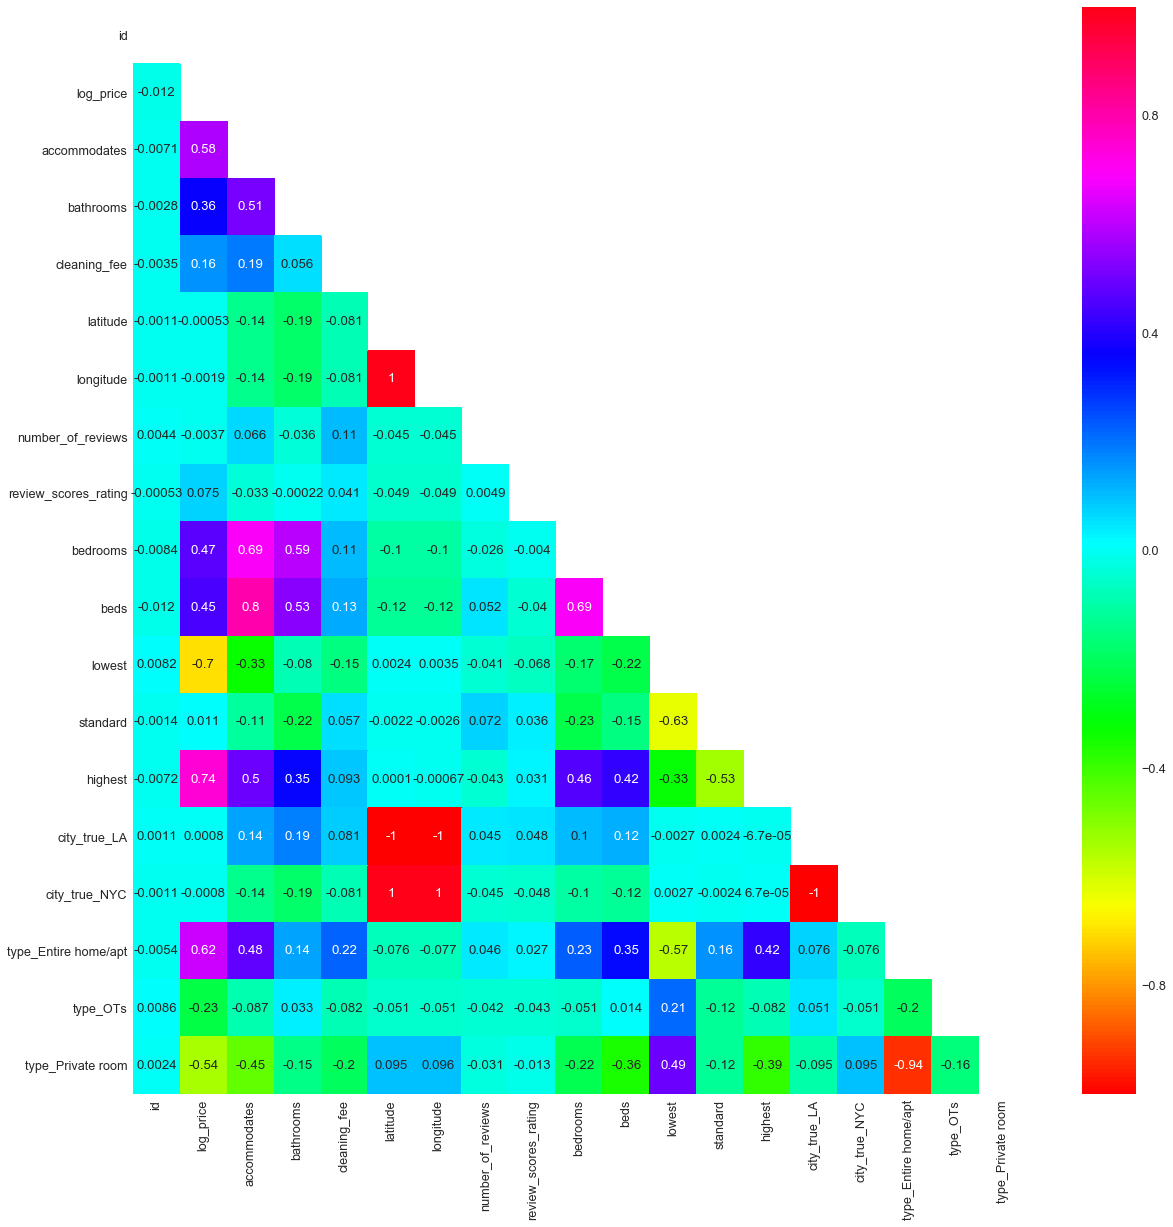

In [16]:
jtplot.style(figsize=(25,25))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, annot=True, mask=mask, cmap="hsv");

# Model`s Classifier
We are trying to predict the price of the rental divided between these categories : `Lowest`, `standard` and `highest`.
After analysing the heatmap above we came to the conlusion that the best var to used were: `type_Private room`,`bedrooms`, `beds`, `city_true_NYC`, `bathrooms` and `accommodates`. We started with LogisticRegression().

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
X = data_train[['bedrooms', 'beds', 'city_true_NYC', 'bathrooms', 'accommodates']]
y = data_train['lowest']
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)
model.fit(X_train, y_train)

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
model.score(X_train, y_train)

0.7599308248611256

In [20]:
model.score(X_test, y_test)

0.7625336268036195

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. 

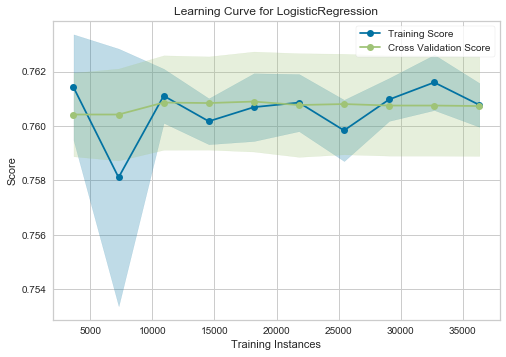

In [21]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(model, train_sizes=np.arange(0.1, 1.1, 0.1))
visualizer.fit(X, y)
visualizer.show();

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. 

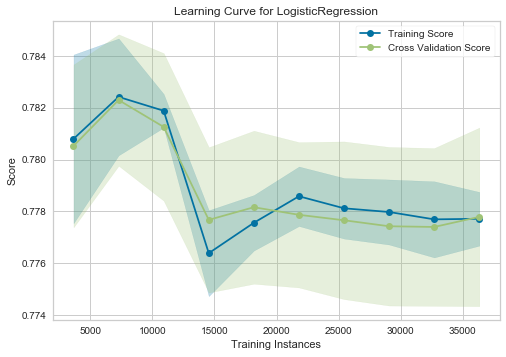

In [22]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(model, train_sizes=np.arange(0.1, 1.1, 0.1), scoring="roc_auc")
visualizer.fit(X, y)
visualizer.show();

<br>
A score of 0.7674 is good for a LogisticRegression. we are finishing predicting for the `lowest` category.

In [23]:
pd.DataFrame(list(zip(X_train.columns, model.coef_[0])), columns=['features', 'coefs']).sort_values(by='coefs')

,features,coefs
4,accommodates,-1.058631
2,city_true_NYC,-0.223006
0,bedrooms,0.202232
1,beds,0.291122
3,bathrooms,0.374586


Now, let's run the model for the `standard` category.

In [24]:
X = data_train[['type_Private room','bedrooms', 'beds', 'city_true_NYC', 'bathrooms', 'accommodates']]
y = data_train['standard']
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)
model.fit(X_train, y_train)

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
model.score(X_train, y_train)

0.6274237501310135

In [26]:
model.score(X_test, y_test)

0.6320004891171436

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. 

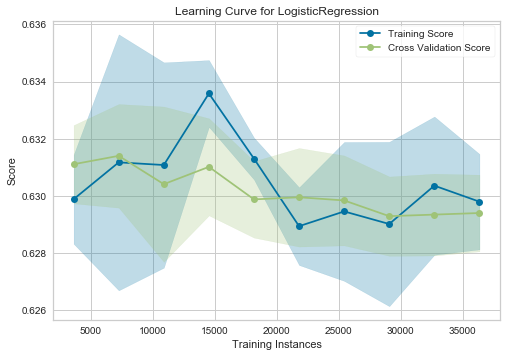

In [27]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(model, train_sizes=np.arange(0.1, 1.1, 0.1))
visualizer.fit(X, y)
visualizer.show();

The results are not good enought, we will try different models. Starting with A Random Forest.

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4, n_estimators=200)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
model.score(X_train, y_train)

0.6432239807148098

In [30]:
model.score(X_test, y_test)

0.6430056248471508

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.


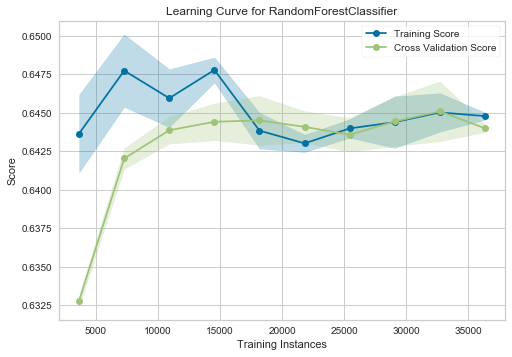

In [31]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(model, train_sizes=np.arange(0.1, 1.1, 0.1))
visualizer.fit(X, y)
visualizer.show();

better results but by a smal margin, around 0.02.

In [32]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=3, n_estimators=200)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
model.score(X_train, y_train)

0.6510847919505293

In [34]:
model.score(X_test, y_test)

0.6471631205673759

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.


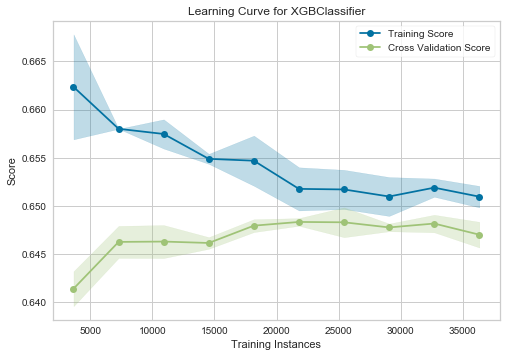

In [35]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(model, train_sizes=np.arange(0.1, 1.1, 0.1))
visualizer.fit(X, y)
visualizer.show();

Xgboost gave a score very similar to the result given by the RandomForest model.

In [36]:
X = data_train[['type_Private room','bedrooms', 'beds', 'bathrooms', 'accommodates']]
y = data_train['highest']
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model.fit(X_train, y_train)

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
model.score(X_train, y_train)

0.8495948313622427

In [38]:
model.score(X_test, y_test)

0.8452645620275678

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. 

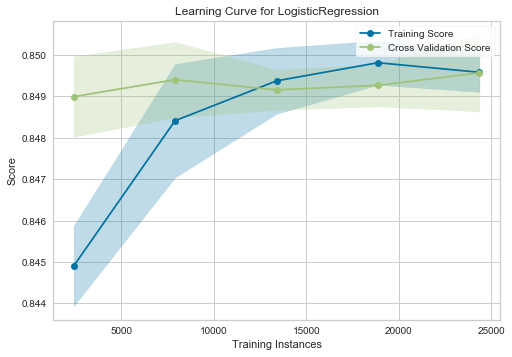

In [39]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(model)
visualizer.fit(X_train, y_train)
visualizer.show();

In [40]:
pd.DataFrame(list(zip(X_train.columns, model.coef_[0])), columns=['features', 'coefs']).sort_values(by='coefs')

,features,coefs
0,type_Private room,-2.120583
2,beds,-0.144277
4,accommodates,0.275595
3,bathrooms,0.604444
1,bedrooms,0.640625


The highest category also has a good score, 0.85.

Let's try to change the way we categorize the values. Now we will divide in: `lowest1/3` = bottom 33%, `standard2/3` = middle 33% and `highest3/3` = top 33%.This is based on the value, not the % of the population.

In [41]:
data_train["lowest1/3"] = data_train['log_price'].apply(lambda x: 1 if x <= data_train['log_price'].max()/3 else 0)
data_train["standard2/3"] = data_train['log_price'].apply(lambda x: 1 if x > data_train['log_price'].max()/3 and x <= 
data_train['log_price'].max()*2/3 else 0)
data_train["highest3/3"] = data_train['log_price'].apply(lambda x: 1 if x > 
data_train['log_price'].max()*2/3 else 0)


In [42]:
data_train

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,standard,highest,city_true_LA,city_true_NYC,type_Entire home/apt,type_OTs,type_Private room,lowest1/3,standard2/3,highest3/3
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,1,0,0,1,1,0,0,0,1,0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,1,0,0,1,1,0,0,0,0,1
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,1,0,0,1,1,0,0,0,1,0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,1,0,1,0,1,0,0,0,1,0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,1,0,0,1,0,0,1,0,1,0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,1,0,1,0,1,0,0,0,1,0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,1,0,0,1,1,0,0,0,0,1
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,0,1,0,1,1,0,0,0,0,1


In [43]:
data_train["lowest1/3"].value_counts()

0    54496
1       24
Name: lowest1/3, dtype: int64

Since the value of the bottom 1/3 is too low we are increasing the cut.

In [44]:
data_train["lowest1/3"] = data_train['log_price'].apply(lambda x: 1 if x <= 4 else 0)

In [45]:
data_train["lowest1/3"].value_counts()

0    47086
1     7434
Name: lowest1/3, dtype: int64

We also need the adjust the standard2/3 values

In [46]:
data_train["standard2/3"].value_counts()

1    39109
0    15411
Name: standard2/3, dtype: int64

In [47]:
data_train["standard2/3"] = data_train['log_price'].apply(lambda x: 1 if x > 4 and x <= 
data_train['log_price'].max()*2/3 else 0)

In [48]:
data_train["standard2/3"].value_counts()

1    31699
0    22821
Name: standard2/3, dtype: int64

In [49]:
data_train["highest3/3"].value_counts()

0    39133
1    15387
Name: highest3/3, dtype: int64

Let's start with a LogisticRegression.

In [50]:
X = data_train[['type_Private room','bedrooms', 'beds', 'city_true_NYC', 'bathrooms', 'accommodates']]
y = data_train['lowest1/3']
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)
model.fit(X_train, y_train)

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
model.score(X_test, y_test)

0.8661653215945219

In [52]:
model.score(X_train, y_train)

0.8618855465884079

In [53]:
X = data_train[['type_Private room','bedrooms', 'beds', 'city_true_NYC', 'bathrooms', 'accommodates']]
y = data_train['standard2/3']
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)
model.fit(X_train, y_train)

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
model.score(X_test, y_test)

0.6856199559794571

In [55]:
model.score(X_train, y_train)

0.6833403207210984

In [56]:
from sklearn.preprocessing import StandardScaler
X = data_train[['type_Private room','bedrooms', 'beds', 'city_true_NYC', 'bathrooms', 'accommodates']]
y = data_train['standard2/3']
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)
scaler = StandardScaler()
scaler.fit(X_train)
model.fit(X_train, y_train)

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
model.score(X_test, y_test)

0.6856199559794571

In [58]:
model.score(X_train, y_train)

0.6833403207210984

In [59]:
X = data_train[['type_Private room','bedrooms', 'beds', 'city_true_NYC', 'bathrooms', 'accommodates']]
y = data_train['highest3/3']
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)
model.fit(X_train, y_train)

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
model.score(X_test, y_test)

0.8163976522377109

In [61]:
model.score(X_train, y_train)

0.816816895503616

the Results are considerable better with the new categorization.<br>
Lowest: from 0.7599 to 0.8661.<br>
Standard: from 0.6438 to 0.6856.<br>
Highest: from 0.8452 to 0.8163.<br>


Just to check, the XGboost model has a very similar score to the LogisticReggresion, `Highest` example bellow.

In [62]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=3, n_estimators=200)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [63]:
model.score(X_test, y_test)

0.8189655172413793

In the end we saw how important it is the way you categorize the data you are trying to predict. Althought we haven't tested the models with real, new data, we know which model to start with.

this is also just one case, but it seems more important to select the right variables and spend your time "fixing" these variables than running a bunch of different models. The results seem similar between then.